In [17]:
# Import Packages
import pandas as pd
import spacy

# Used for plotting
import matplotlib.pyplot as plt

In [ ]:
# Declare functions
def tokenize_spacy(text, nlp):
    doc = nlp(text)
    return [token.text for token in doc]

def lemmatize_spacy(text, nlp):
    doc = nlp(text)
    return [token.lemma_ for token in doc]

In [2]:
# Load the Data
df = pd.read_csv('gamespot_reviews.csv').iloc[:50]
df.head()

,Unnamed: 0,text,label
0,0,"I often got real, physical headaches while pla...",good
1,1,"Since its debut a decade ago, Dead Rising has ...",good
2,2,Ghost Recon: Wildlands is a squad based Tom Cl...,good
3,3,There is nothing subtle about Mother Russia Bl...,good
4,4,There are times when I Am Setsuna's mimicry is...,good


In [4]:
# Load Spacy Multi-task Convolutional Neural Network Model
# This is a neural network model (aka "AI") that was trained to perform the basic NLP pipeline
nlp = spacy.load("en_core_web_sm")

# Execute the pipeline
df['tokenized'] = df['text'].apply(lambda x: tokenize_spacy(x, nlp))
df['lemmatized'] = df['text'].apply(lambda x: lemmatize_spacy(x, nlp))

In [5]:
print(df.text[0][:125])

I often got real, physical headaches while playing Obduction. Towards the end of the game, I’d regularly get completely stuck


In [6]:
print(df.tokenized[0][:25])

['I', 'often', 'got', 'real', ',', 'physical', 'headaches', 'while', 'playing', 'Obduction', '.', 'Towards', 'the', 'end', 'of', 'the', 'game', ',', 'I', '’d', 'regularly', 'get', 'completely', 'stuck', 'when']


In [7]:
# Bonus knowledge:
# Notice how "Obduction" is still capitalized, whereas "Towards" is not.
# The neural network executed the casefolding along side the lemmatization.
print(df.lemmatized[0][:25])

['-PRON-', 'often', 'get', 'real', ',', 'physical', 'headache', 'while', 'play', 'Obduction', '.', 'towards', 'the', 'end', 'of', 'the', 'game', ',', '-PRON-', 'would', 'regularly', 'get', 'completely', 'stick', 'when']


Text(0.5, 1.0, 'First 5 Documents')

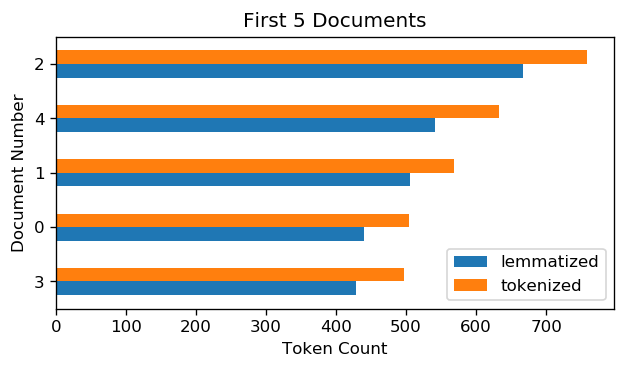

In [22]:
# Visualiation
fig, ax = plt.subplots(figsize=(6,3), dpi=120)
pd.DataFrame(df.lemmatized.apply(lambda x: len(set(x)))).join(df.tokenized.apply(lambda x: len(set(x)))).iloc[:5].sort_values('tokenized').plot(kind='barh', ax=ax)
ax.set_ylabel('Document Number')
ax.set_xlabel('Token Count')
ax.set_title('First 5 Documents')